 <p style="padding:25px;background-color:#0f4c3d;margin:0;color:white;font-family:Comic Sans MS;font-size:160%;text-align:center;border-radius: 40px 60px;overflow:hidden;font-weight:550">"Anime Data Dive : A Data-Driven Exploration of Anime"</p> 

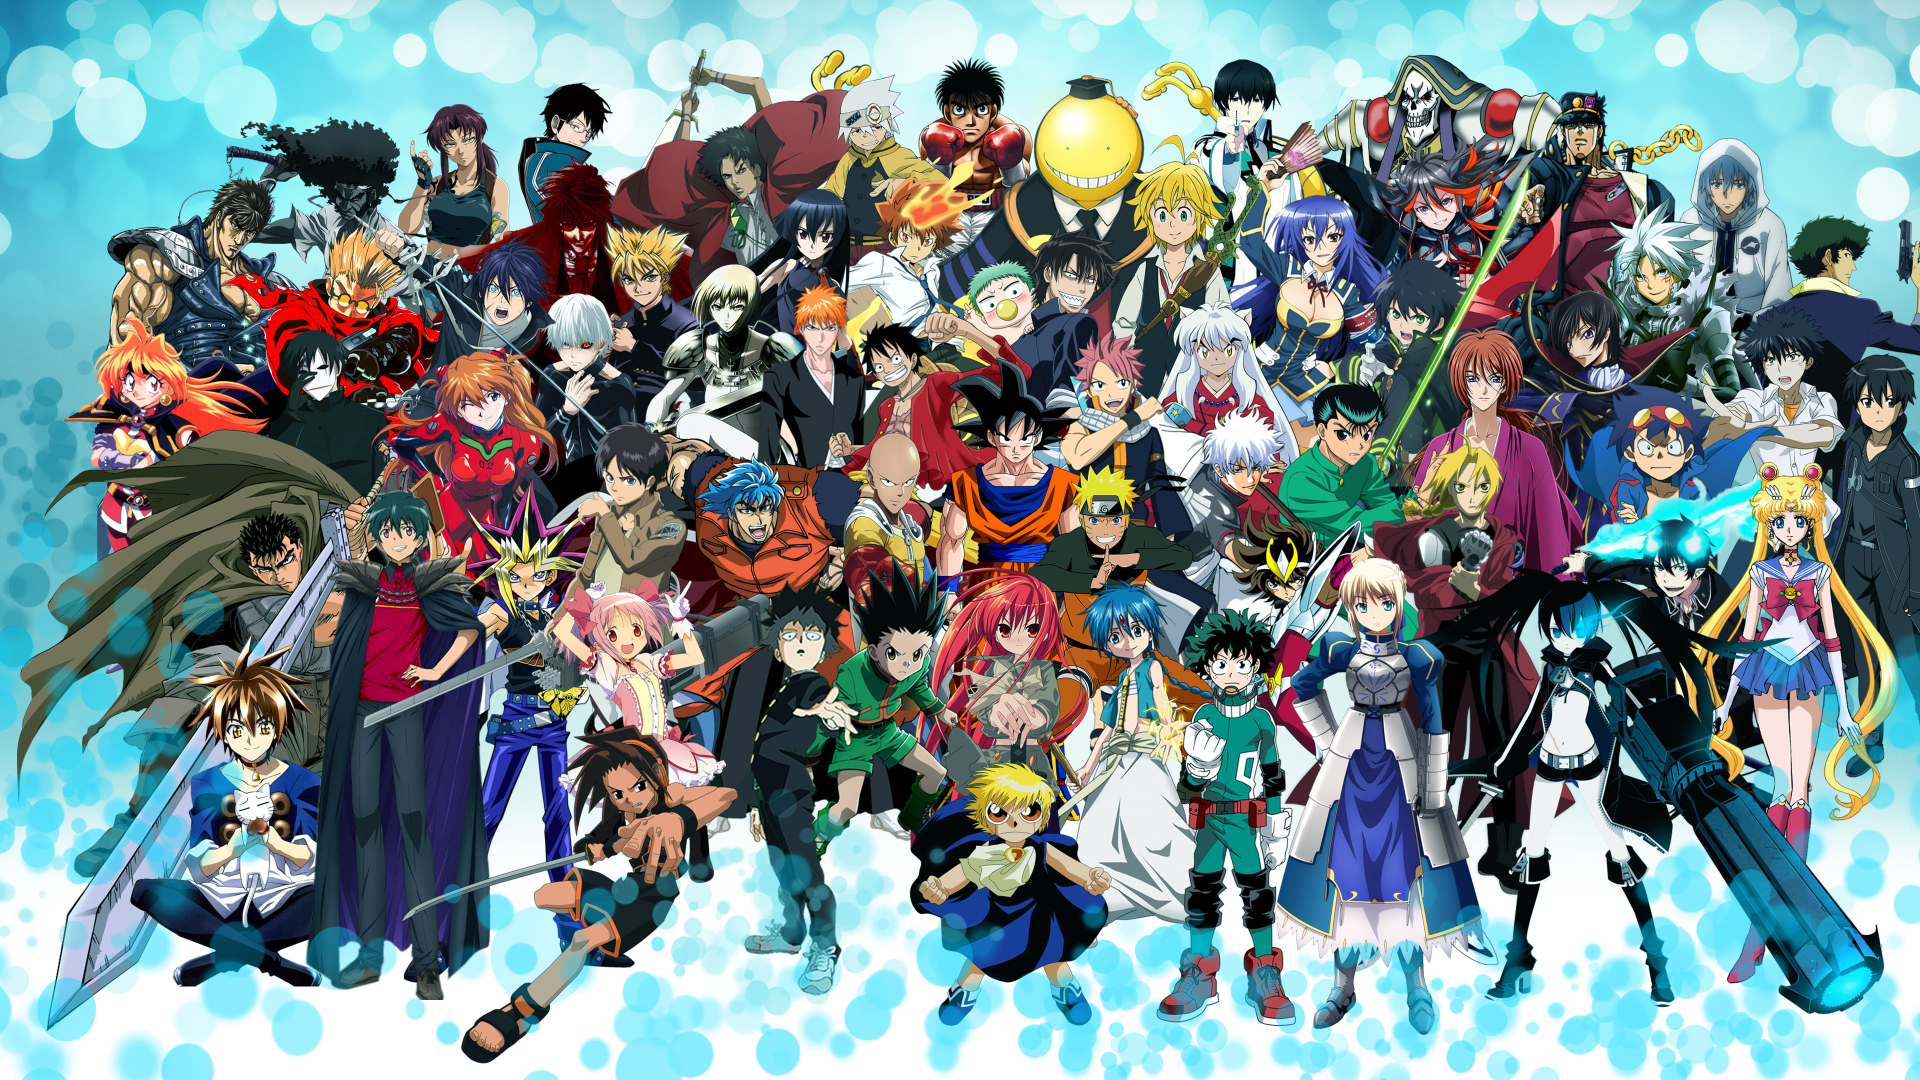

# About:

### This project is of my love towards Anime and Data Visualization, an analysis on Anime Types, Studios, Genre and the overall story of Anime's legacy. 

## Findings:
## *What Anime are on the top?



## *Analyzing anime suggestions and recommendations is an interesting and valuable task for a data analyst, as it can provide insights into user preferences and help improve recommendation systems. Businesses need to provide suggestions based on viewers likings and needs in order to create a better streaming environment that boosts revenue and increases the time spent on a website. 

#          Importing libraries 📚 

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mat  
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

import warnings
warnings.filterwarnings('ignore')

# Load data 💾

In [2]:
anime = pd.read_csv("AnimeList.csv")
anime

Ranking                                Title   Type  \
0            1     Fullmetal Alchemist: Brotherhood     TV   
1            2                             Gintama°     TV   
2            3                          Steins;Gate     TV   
3            4   Shingeki no Kyojin Season 3 Part 2     TV   
4            5                             Gintama'     TV   
...        ...                                  ...    ...   
13995    13996  Robot Taekwon V wa Hwanggeum Nalgae  Movie   
13996    13997       Robot Taekwon V: Wooju Jakjeon  Movie   
13997    13998                         Robot Trains     TV   
13998    13999                   Rock'n Roll Sentou  Movie   
13999    14000                          Rocket Dive  Music   

                         Japanese                        Aired Episodes  \
0      鋼の錬金術師 FULLMETAL ALCHEMIST   Apr 5, 2009 to Jul 4, 2010       64   
1                             銀魂°  Apr 8, 2015 to Mar 30, 2016       51   
2                     STEINS;GATE  Apr 6, 2011 to Sep 14, 2011       24   
3            進撃の巨人 Season3 Part.2  Apr 29, 2019 to Jul 1, 2019       10   
4                             銀魂'  Apr 4, 2011 to Mar 26, 2012       51   
...                           ...                          ...      ...   
13995           로보트 태권V와 황금날개의 대결                    26-Jul-78        1   
13996                로보트 태권V 우주작전                    13-Dec-76        1   
13997                        none                         2015       32   
13998                   ロックンロール銭湯                         2007        1   
13999                 ROCKET DIVE                    23-May-18        1   

              Duration  Score        Source  \
0      24 min. per ep.   9.14         Manga   
1      24 min. per ep.   9.08         Manga   
2      24 min. per ep.   9.08  Visual novel   
3      23 min. per ep.   9.07         Manga   
4      24 min. per ep.   9.05         Manga   
...                ...    ...           ...   
13995     1 hr. 6 min.    NaN       Unknown   
13996            1 hr.    NaN       Unknown   
13997  13 min. per ep.    NaN      Original   
13998           2 min.    NaN      Original   
13999           2 min.    NaN      Original   

                                                  Genres  \
0      ActionAction,AdventureAdventure,DramaDrama,Fan...   
1                 ActionAction,ComedyComedy,Sci-FiSci-Fi   
2               DramaDrama,Sci-FiSci-Fi,SuspenseSuspense   
3                                ActionAction,DramaDrama   
4                 ActionAction,ComedyComedy,Sci-FiSci-Fi   
...                                                  ...   
13995                                               None   
13996                          ActionAction,Sci-FiSci-Fi   
13997                                               None   
13998                                       ComedyComedy   
13999                                               None   

                                                  Themes   Licensors  \
0                                       MilitaryMilitary  Funimation   
1      Gag HumorGag Humor,HistoricalHistorical,Parody...  Funimation   
2      PsychologicalPsychological,Time TravelTime Travel  Funimation   
3             GoreGore,MilitaryMilitary,SurvivalSurvival  Funimation   
4      Gag HumorGag Humor,HistoricalHistorical,Parody...    add some   
...                                                  ...         ...   
13995                                         MechaMecha    add some   
13996                                         MechaMecha    add some   
13997                                               None    add some   
13998                                               None    add some   
13999                                         MusicMusic    add some   

                                               Producers  \
0      Aniplex,Square Enix,Mainichi Broadcasting Syst...   
1                                TV Tokyo,Aniplex,Dentsu   
2      Frontier Works,Media Fa

# Understanding the data

## Pre-processing ⚒️

In [3]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ranking    14000 non-null  int64  
 1   Title      14000 non-null  object 
 2   Type       14000 non-null  object 
 3   Japanese   14000 non-null  object 
 4   Aired      14000 non-null  object 
 5   Episodes   14000 non-null  object 
 6   Duration   14000 non-null  object 
 7   Score      12717 non-null  float64
 8   Source     14000 non-null  object 
 9   Genres     14000 non-null  object 
 10  Themes     14000 non-null  object 
 11  Licensors  14000 non-null  object 
 12  Producers  14000 non-null  object 
 13  Rating     14000 non-null  object 
 14  Status     14000 non-null  object 
 15  Studios    14000 non-null  object 
 16  Members    14000 non-null  object 
dtypes: float64(1), int64(1), object(15)
memory usage: 1.8+ MB


In [4]:
anime.head()

Ranking                               Title Type  \
0        1    Fullmetal Alchemist: Brotherhood   TV   
1        2                            Gintama°   TV   
2        3                         Steins;Gate   TV   
3        4  Shingeki no Kyojin Season 3 Part 2   TV   
4        5                            Gintama'   TV   

                     Japanese                        Aired Episodes  \
0  鋼の錬金術師 FULLMETAL ALCHEMIST   Apr 5, 2009 to Jul 4, 2010       64   
1                         銀魂°  Apr 8, 2015 to Mar 30, 2016       51   
2                 STEINS;GATE  Apr 6, 2011 to Sep 14, 2011       24   
3        進撃の巨人 Season3 Part.2  Apr 29, 2019 to Jul 1, 2019       10   
4                         銀魂'  Apr 4, 2011 to Mar 26, 2012       51   

          Duration  Score        Source  \
0  24 min. per ep.   9.14         Manga   
1  24 min. per ep.   9.08         Manga   
2  24 min. per ep.   9.08  Visual novel   
3  23 min. per ep.   9.07         Manga   
4  24 min. per ep.   9.05         Manga   

                                              Genres  \
0  ActionAction,AdventureAdventure,DramaDrama,Fan...   
1             ActionAction,ComedyComedy,Sci-FiSci-Fi   
2           DramaDrama,Sci-FiSci-Fi,SuspenseSuspense   
3                            ActionAction,DramaDrama   
4             ActionAction,ComedyComedy,Sci-FiSci-Fi   

                                              Themes   Licensors  \
0                                   MilitaryMilitary  Funimation   
1  Gag HumorGag Humor,HistoricalHistorical,Parody...  Funimation   
2  PsychologicalPsychological,Time TravelTime Travel  Funimation   
3         GoreGore,MilitaryMilitary,SurvivalSurvival  Funimation   
4  Gag HumorGag Humor,HistoricalHistorical,Parody...    add some   

                                           Producers  \
0  Aniplex,Square Enix,Mainichi Broadcasting Syst...   
1                            TV Tokyo,Aniplex,Dentsu   
2  Frontier Works,Media Factory,Movic,AT-X,Kadoka...   
3  Production I.G,Dentsu,Mainichi Broadcasting Sy...   
4  TV Tokyo,Aniplex,Dentsu,Trinity Sound,Miracle ...   

                           Rating           Status                Studios  \
0  R - 17+ (violence & profanity)  Finished Airing                  Bones   
1       PG-13 - Teens 13 or older  Finished Airing  Bandai Namco Pictures   
2       PG-13 - Teens 13 or older  Finished Airing              White Fox   
3  R - 17+ (violence & profanity)  Finished Airing             Wit Studio   
4       PG-13 - Teens 13 or older  Finished Airing                Sunrise   

     Members  
0  2,893,578  
1    537,065  
2  2,245,494  
3  1,848,076  
4    473,422

In [5]:
anime.tail()

Ranking                                Title   Type           Japanese  \
13995    13996  Robot Taekwon V wa Hwanggeum Nalgae  Movie  로보트 태권V와 황금날개의 대결   
13996    13997       Robot Taekwon V: Wooju Jakjeon  Movie       로보트 태권V 우주작전   
13997    13998                         Robot Trains     TV               none   
13998    13999                   Rock'n Roll Sentou  Movie          ロックンロール銭湯   
13999    14000                          Rocket Dive  Music        ROCKET DIVE   

           Aired Episodes         Duration  Score    Source  \
13995  26-Jul-78        1     1 hr. 6 min.    NaN   Unknown   
13996  13-Dec-76        1            1 hr.    NaN   Unknown   
13997       2015       32  13 min. per ep.    NaN  Original   
13998       2007        1           2 min.    NaN  Original   
13999  23-May-18        1           2 min.    NaN  Original   

                          Genres      Themes Licensors            Producers  \
13995                       None  MechaMecha  add some  None found,add some   
13996  ActionAction,Sci-FiSci-Fi  MechaMecha  add some  None found,add some   
13997                       None        None  add some  None found,add some   
13998               ComedyComedy        None  add some  None found,add some   
13999                       None  MusicMusic  add some  None found,add some   

                          Rating           Status   Studios Members  
13995              PG - Children  Finished Airing  add some     312  
13996              PG - Children  Finished Airing  add some     337  
13997               G - All Ages  Finished Airing  add some      81  
13998  PG-13 - Teens 13 or older  Finished Airing  add some      94  
13999               G - All Ages  Finished Airing  add some     216

In [6]:
anime.shape

(14000, 17)

In [7]:
anime.describe().T

count         mean          std   min      25%      50%       75%  \
Ranking  14000.0  7000.500000  4041.596219  1.00  3500.75  7000.50  10500.25   
Score    12717.0     6.494395     0.913737  1.85     5.88     6.51      7.16   

              max  
Ranking  14000.00  
Score        9.14

In [8]:
anime.describe(include=object)

Title   Type Japanese          Aired Episodes  \
count                    14000  14000    14000          14000    14000   
unique                   13960      7    13240           9922      200   
top     Tenbatsu Angel Rabbie☆     TV     none  Not available        1   
freq                         2   4498       29             41     6686   

               Duration    Source Genres Themes Licensors  \
count             14000     14000  14000  14000     14000   
unique              310        17    804    689        71   
top     24 min. per ep.  Original   None   None  add some   
freq               1759      4352   1805   5158      9904   

                  Producers                     Rating           Status  \
count                 14000                      14000            14000   
unique                 3699                          6                2   
top     None found,add some  PG-13 - Teens 13 or older  Finished Airing   
freq                   6046                       6450            13833   

         Studios Members  
count      14000   14000  
unique       626    9368  
top     add some      23  
freq        3927      20

In [9]:
anime.columns

Index(['Ranking', 'Title', 'Type', 'Japanese', 'Aired', 'Episodes', 'Duration',
       'Score', 'Source', 'Genres', 'Themes', 'Licensors', 'Producers',
       'Rating', 'Status', 'Studios', 'Members'],
      dtype='object')

In [10]:
anime.isnull().sum()

Ranking         0
Title           0
Type            0
Japanese        0
Aired           0
Episodes        0
Duration        0
Score        1283
Source          0
Genres          0
Themes          0
Licensors       0
Producers       0
Rating          0
Status          0
Studios         0
Members         0
dtype: int64

In [11]:
def numerical(col):
    print('The mean of the  is:', anime[col].mean())
    print('The median of the  is :',anime[col].median())
    print('The mode of the  is :',anime[col].mode()[0])
    print('The standard deviation of the  is :',anime[col].std())
    print('Number of missing values in the  is:',anime[col].isnull().sum())

In [12]:
numerical('Score')

The mean of the  is: 6.4943949044585985
The median of the  is : 6.51
The mode of the  is : 6.51
The standard deviation of the  is : 0.9137374926490811
Number of missing values in the  is: 1283


In [13]:
anime['Score'].fillna('6.5',inplace=True)

In [14]:
anime['Episodes'] = pd.to_numeric(anime['Episodes'],errors='coerce')

In [15]:
numerical('Episodes')

The mean of the  is: 12.591899863319187
The median of the  is : 2.0
The mode of the  is : 1.0
The standard deviation of the  is : 44.952001458251374
Number of missing values in the  is: 99


In [16]:
anime['Episodes'].fillna('13',inplace=True)

In [17]:
# Check the data types of the columns
print(anime['Episodes'].dtypes)

# Convert 'Column1' to int (assuming the values are valid integers)
anime['Episodes'] = anime['Episodes'].astype(int)

# Check the data types after conversion
print(anime['Episodes'].dtypes)

object
int32


In [18]:
anime['Score'] = pd.to_numeric(anime['Score'],errors='coerce')

In [19]:
anime['Episodes'].dtype

dtype('int32')

In [20]:
anime['Members'] = anime['Members'].str.replace(',', '').astype(int)

In [21]:
anime['Members'].fillna(0, inplace=True)  # Replace missing values with 0
anime['Members'] = anime['Members'].astype(int)

In [22]:
import re
# Define regular expressions to match hours and minutes
hour_pattern = re.compile(r'(\d+)\s*hr\.?')
minute_pattern = re.compile(r'(\d+)\s*min\.?')

def convert_to_minutes(duration):
    total_minutes = 0

    # Extract hours and add to total
    hours_match = hour_pattern.search(duration)
    if hours_match:
        total_minutes += int(hours_match.group(1)) * 60

    # Extract minutes and add to total
    minutes_match = minute_pattern.search(duration)
    if minutes_match:
        total_minutes += int(minutes_match.group(1))

    return total_minutes

# Convert durations to minutes
anime['Duration_in_Minutes'] = anime['Duration'].apply(convert_to_minutes)


In [23]:
import pandas as pd

# Sample DataFrame
anime['Duration_in_Minutes'],anime['Episodes']


# Create a new column by multiplying two existing columns
anime['Total_run_time'] = anime['Duration_in_Minutes'] * anime['Episodes']


In [24]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Ranking              14000 non-null  int64  
 1   Title                14000 non-null  object 
 2   Type                 14000 non-null  object 
 3   Japanese             14000 non-null  object 
 4   Aired                14000 non-null  object 
 5   Episodes             14000 non-null  int32  
 6   Duration             14000 non-null  object 
 7   Score                14000 non-null  float64
 8   Source               14000 non-null  object 
 9   Genres               14000 non-null  object 
 10  Themes               14000 non-null  object 
 11  Licensors            14000 non-null  object 
 12  Producers            14000 non-null  object 
 13  Rating               14000 non-null  object 
 14  Status               14000 non-null  object 
 15  Studios              14000 non-null 

In [25]:
anime.isnull().sum()

Ranking                0
Title                  0
Type                   0
Japanese               0
Aired                  0
Episodes               0
Duration               0
Score                  0
Source                 0
Genres                 0
Themes                 0
Licensors              0
Producers              0
Rating                 0
Status                 0
Studios                0
Members                0
Duration_in_Minutes    0
Total_run_time         0
dtype: int64

In [26]:
anime

Ranking                                Title   Type  \
0            1     Fullmetal Alchemist: Brotherhood     TV   
1            2                             Gintama°     TV   
2            3                          Steins;Gate     TV   
3            4   Shingeki no Kyojin Season 3 Part 2     TV   
4            5                             Gintama'     TV   
...        ...                                  ...    ...   
13995    13996  Robot Taekwon V wa Hwanggeum Nalgae  Movie   
13996    13997       Robot Taekwon V: Wooju Jakjeon  Movie   
13997    13998                         Robot Trains     TV   
13998    13999                   Rock'n Roll Sentou  Movie   
13999    14000                          Rocket Dive  Music   

                         Japanese                        Aired  Episodes  \
0      鋼の錬金術師 FULLMETAL ALCHEMIST   Apr 5, 2009 to Jul 4, 2010        64   
1                             銀魂°  Apr 8, 2015 to Mar 30, 2016        51   
2                     STEINS;GATE  Apr 6, 2011 to Sep 14, 2011        24   
3            進撃の巨人 Season3 Part.2  Apr 29, 2019 to Jul 1, 2019        10   
4                             銀魂'  Apr 4, 2011 to Mar 26, 2012        51   
...                           ...                          ...       ...   
13995           로보트 태권V와 황금날개의 대결                    26-Jul-78         1   
13996                로보트 태권V 우주작전                    13-Dec-76         1   
13997                        none                         2015        32   
13998                   ロックンロール銭湯                         2007         1   
13999                 ROCKET DIVE                    23-May-18         1   

              Duration  Score        Source  \
0      24 min. per ep.   9.14         Manga   
1      24 min. per ep.   9.08         Manga   
2      24 min. per ep.   9.08  Visual novel   
3      23 min. per ep.   9.07         Manga   
4      24 min. per ep.   9.05         Manga   
...                ...    ...           ...   
13995     1 hr. 6 min.   6.50       Unknown   
13996            1 hr.   6.50       Unknown   
13997  13 min. per ep.   6.50      Original   
13998           2 min.   6.50      Original   
13999           2 min.   6.50      Original   

                                                  Genres  \
0      ActionAction,AdventureAdventure,DramaDrama,Fan...   
1                 ActionAction,ComedyComedy,Sci-FiSci-Fi   
2               DramaDrama,Sci-FiSci-Fi,SuspenseSuspense   
3                                ActionAction,DramaDrama   
4                 ActionAction,ComedyComedy,Sci-FiSci-Fi   
...                                                  ...   
13995                                               None   
13996                          ActionAction,Sci-FiSci-Fi   
13997                                               None   
13998                                       ComedyComedy   
13999                                               None   

                                                  Themes   Licensors  \
0                                       MilitaryMilitary  Funimation   
1      Gag HumorGag Humor,HistoricalHistorical,Parody...  Funimation   
2      PsychologicalPsychological,Time TravelTime Travel  Funimation   
3             GoreGore,MilitaryMilitary,SurvivalSurvival  Funimation   
4      Gag HumorGag Humor,HistoricalHistorical,Parody...    add some   
...                                                  ...         ...   
13995                                         MechaMecha    add some   
13996                                         MechaMecha    add some   
13997                                               None    add some   
13998                                               None    add some   
13999                                         MusicMusic    add some   

                                               Producers  \
0      Aniplex,Square Enix,Mainichi Broadcasting Syst...   
1                                TV Tokyo,Aniplex,Dentsu   
2      Frontier Wo

In [27]:
anime.isnull().sum().to_frame().T

Ranking  Title  Type  Japanese  Aired  Episodes  Duration  Score  Source  \
0        0      0     0         0      0         0         0      0       0   

   Genres  Themes  Licensors  Producers  Rating  Status  Studios  Members  \
0       0       0          0          0       0       0        0        0   

   Duration_in_Minutes  Total_run_time  
0                    0               0

In [28]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Ranking              14000 non-null  int64  
 1   Title                14000 non-null  object 
 2   Type                 14000 non-null  object 
 3   Japanese             14000 non-null  object 
 4   Aired                14000 non-null  object 
 5   Episodes             14000 non-null  int32  
 6   Duration             14000 non-null  object 
 7   Score                14000 non-null  float64
 8   Source               14000 non-null  object 
 9   Genres               14000 non-null  object 
 10  Themes               14000 non-null  object 
 11  Licensors            14000 non-null  object 
 12  Producers            14000 non-null  object 
 13  Rating               14000 non-null  object 
 14  Status               14000 non-null  object 
 15  Studios              14000 non-null 

![](https://images.unsplash.com/photo-1613376023733-0a73315d9b06?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1740&q=80)

In [29]:
anime.to_csv('A Data-Driven Exploration of Anime.csv',index=False)

In [30]:
from sqlalchemy import create_engine
import mysql.connector as sql

In [31]:
db = sql.connect(host = 'localhost',user='root',password = 'Ramalingam123')

In [32]:
mycursor = db.cursor()

In [33]:
mycursor.execute("create database Anime")

In [34]:
mycursor.execute("use Anime")

In [35]:
engine = create_engine("mysql+pymysql://{user}:{pw}@{host}/{db}"
.format(host='localhost', db='Anime', user='root', pw='Ramalingam123'))

anime.to_sql('Anime_table', engine, index=False, if_exists='replace')

14000

## Imported the cleaned data to MY SQL

In [36]:
#Seprating out the categorical and continuous variables-----> unique and nunique
numeric_columns = []
categorical_columns = []

for column in anime.columns:
    if pd.api.types.is_numeric_dtype(anime[column]):
        numeric_columns.append(column)
    else:
        categorical_columns.append(column)
print(tabulate({"Categorical":categorical_columns,
                "numerical": numeric_columns}, headers = ["categorical", "numerical"]))

categorical    numerical
-------------  -------------------
Title          Ranking
Type           Episodes
Japanese       Score
Aired          Members
Duration       Duration_in_Minutes
Source         Total_run_time
Genres
Themes
Licensors
Producers
Rating
Status
Studios


## **Seperated the columns of the Anime database as Categorical and Numerical. 

# Exploring into Anime data

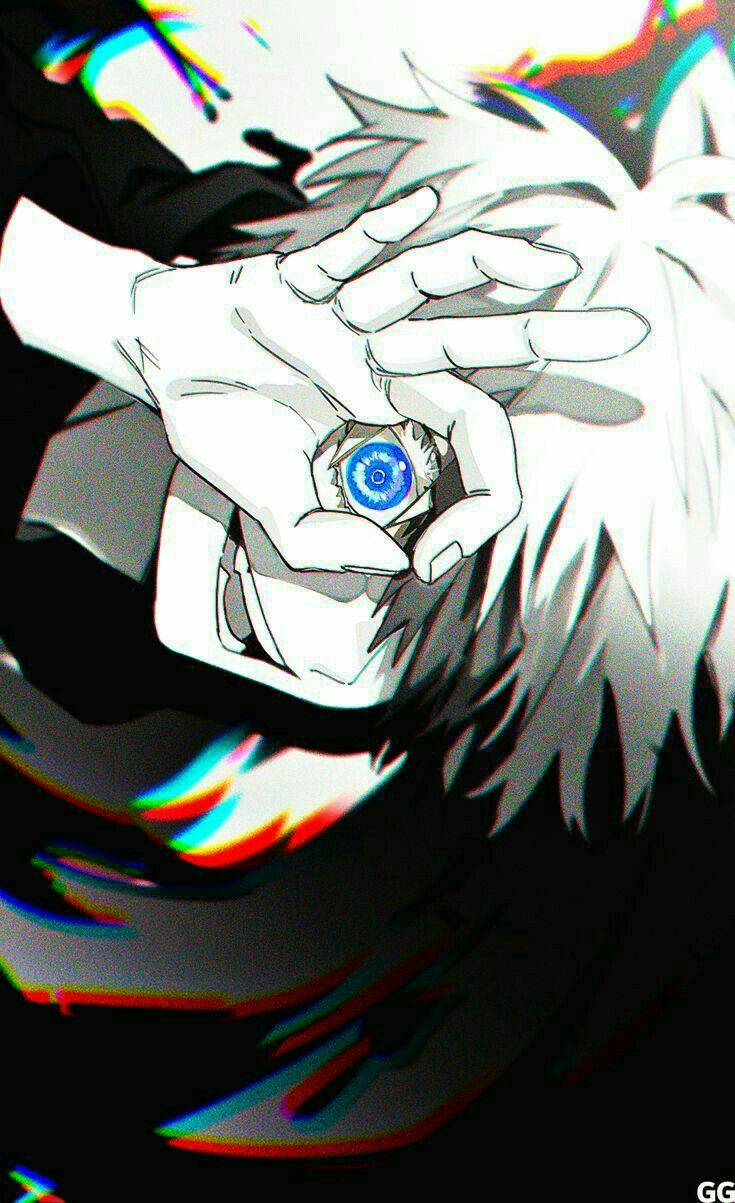

## Type wise Status of anime: 

In [37]:
piv2 = pd.pivot_table(anime,index=['Type','Status'],values=['Title'],aggfunc='count')
piv2

Title
Type    Status                 
Movie   Currently Airing      2
        Finished Airing    2531
Music   Currently Airing      3
        Finished Airing    1265
ONA     Currently Airing     58
        Finished Airing    1651
OVA     Currently Airing      7
        Finished Airing    1984
Special Currently Airing     12
        Finished Airing    1988
TV      Currently Airing     85
        Finished Airing    4413
Unknown Finished Airing       1

### It is found that the highest numbers of Animes Status of Finished Airing are at TV Type of about 4413 animes.

# OUTLINE ON TYPE

### **Movie: Feature-length films with high production quality, often adapting source material or telling self-contained stories.

### **Music: Focused on musical performances, featuring bands or idols, with variable episode length, and used for promotion.

### **ONA (Original Net Animation): Internet-released anime with flexible episode length and irregular schedules.

### **OVA (Original Video Animation): Direct-to-video releases, spanning different genres, sometimes with mature themes.

### **Special: Standalone or bonus episodes, shorter in length, often bundled with TV series releases.

### **TV (Television): Multi-episode series broadcast on TV, covering various genres for a broad audience.

# Number of anime watchers according to each type

In [38]:
Movie = anime[(anime.Type == 'Movie')]

In [39]:
sum_of_Movie = Movie['Members'].sum()
sum_of_Movie

88655513

In [40]:
Music = anime[(anime.Type == 'Music')]

In [41]:
sum_of_Music = Music['Members'].sum()
sum_of_Music

2062990

In [42]:
ONA = anime[(anime.Type == 'ONA')]

In [43]:
sum_of_ONA = ONA['Members'].sum()
sum_of_ONA

18487662

In [44]:
OVA = anime[(anime.Type == 'OVA')]

In [45]:
sum_of_OVA = OVA['Members'].sum()
sum_of_OVA

41084199

In [46]:
Special = anime[(anime.Type == 'Special')]

In [47]:
sum_of_Special = Special['Members'].sum()
sum_of_Special

33314028

In [48]:
TV = anime[(anime.Type == 'TV')]

In [49]:
sum_of_TV = TV['Members'].sum()
sum_of_TV

612223892

In [50]:
anime_data= anime.groupby('Type')['Members'].sum().reset_index()

In [51]:
anime_data

Type    Members
0    Movie   88655513
1    Music    2062990
2      ONA   18487662
3      OVA   41084199
4  Special   33314028
5       TV  612223892
6  Unknown        616

In [52]:
anime_data.sort_values('Members')

Type    Members
6  Unknown        616
1    Music    2062990
2      ONA   18487662
4  Special   33314028
3      OVA   41084199
0    Movie   88655513
5       TV  612223892

## It is found that the highest numbers of Members are of the Type TV of about 612.2 billion.

In [53]:
anime_data2= anime.groupby('Licensors')['Members'].sum().reset_index()
anime_data2

Licensors    Members
0     4Kids Entertainment    2895343
1               ADV Films   17706091
2        AN Entertainment       9757
3                  Active      15666
4        Anchor Bay Films     504918
..                    ...        ...
66     Warner Bros. Japan     253404
67  Warner Bros. Pictures      95418
68               add some  151668638
69               bilibili     244275
70                  iQIYI       1837

[71 rows x 2 columns]

In [54]:
anime_data2.sort_values('Members',ignore_index=True)

Licensors    Members
0          Bandai Namco Online         50
1              B.CMAY PICTURES        260
2   Haoliners Animation League       1117
3                        iQIYI       1837
4                   Arts Magic       1988
..                         ...        ...
66                   VIZ Media   43271486
67          Aniplex of America   77362271
68            Sentai Filmworks  132662122
69                    add some  151668638
70                  Funimation  273904220

[71 rows x 2 columns]

## It is found that the Licensor Funimation has the highest numbers of Members of about 273.9 billion.

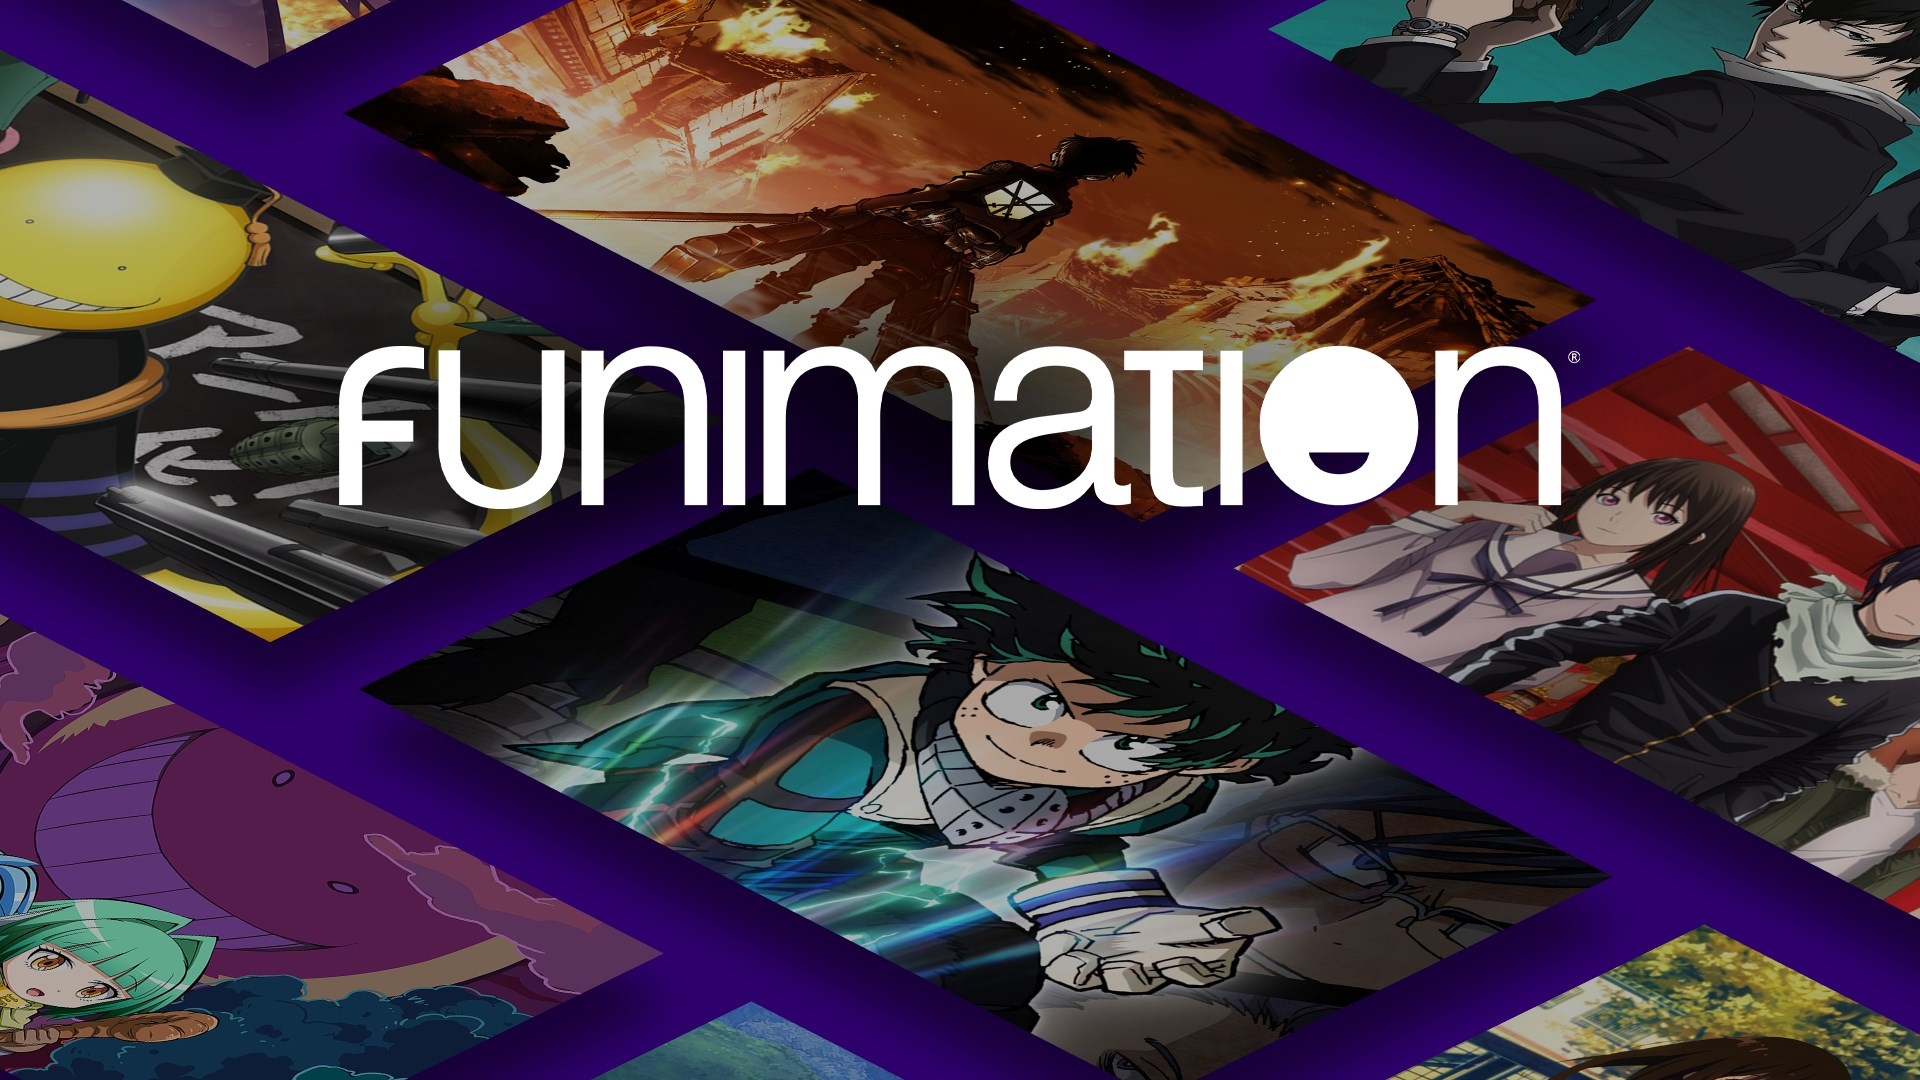

# Studio wise count of the title

In [55]:
anime_data3= anime.groupby('Studios')['Title'].count().reset_index()
anime_data3

Studios  Title
0              10Gauge      4
1                  1IN      1
2    2:10 AM Animation      5
3                 8bit     47
4         A-1 Pictures    214
..                 ...    ...
621          monofilmo      3
622          pH Studio      4
623     production doA      3
624      studio MOTHER      1
625           ufotable     67

[626 rows x 2 columns]

In [56]:
anime_data3.sort_values('Title',ignore_index=True)

Studios  Title
0      Sunwoo Entertainment      1
1               Enoki Films      1
2    Minami Machi Bugyousho      1
3                    Mimoid      1
4                   FIREBUG      1
..                      ...    ...
621                Madhouse    355
622               J.C.Staff    360
623                 Sunrise    510
624          Toei Animation    704
625                add some   3927

[626 rows x 2 columns]

### It is found that the Studios Toei Animation has the highest numbers of Animes of about 704 Anime.

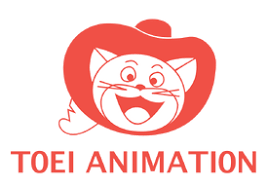

# Longest run time anime

In [57]:
anime.sort_values('Total_run_time')

Ranking                               Title     Type  \
11229    11230       Green Dakara x Bakemono no Ko      ONA   
3786      3787                           Mameshiba  Special   
7493      7494          Hungry Days: Aoharu ka yo.  Special   
7500      7501         Kyoto Animation: Megane-hen  Special   
10561    10562            Attakai tte, Gohoubi da.  Special   
...        ...                                 ...      ...   
13867    13868                Qi Qu Baodian Julebu       TV   
283        284                  Naruto: Shippuuden       TV   
8691      8692      Shima Shima Tora no Shimajirou       TV   
958        959                     Doraemon (1979)       TV   
8655      8656  Manga Nippon Mukashibanashi (1976)       TV   

                    Japanese                         Aired  Episodes  \
11229  GREEN DA・KA・RA×バケモノの子  Jun 24, 2015 to Jul 11, 2015         2   
3786                     豆しば           Mar 1, 2008 to 2013        24   
7493     HUNGRY DAYS　アオハルかよ。    Jun 7, 2017 to Feb 7, 2020        11   
7500     京都アニメーション CM 「メガネ編」                     21-May-12         1   
10561         あったかいって、ごほうびだ。                      4-Dec-19         1   
...                      ...                           ...       ...   
13867                奇趣宝典俱乐部              Jul 1, 2008 to ?       499   
283                 ナルト- 疾風伝  Feb 15, 2007 to Mar 23, 2017       500   
8691            しましまとらのしまじろう  Dec 13, 1993 to Mar 31, 2008       726   
958                    ドラえもん   Apr 2, 1979 to Mar 18, 2005      1787   
8655          まんが日本昔ばなし（第2期）    Jan 7, 1976 to Sep 3, 1994      1471   

              Duration  Score       Source  \
11229  15 sec. per ep.   5.40        Other   
3786   30 sec. per ep.   7.03     Original   
7493   30 sec. per ep.   6.30        Other   
7500           30 sec.   6.30  Light novel   
10561          31 sec.   5.61     Original   
...                ...    ...          ...   
13867  20 min. per ep.   6.50     Original   
283    23 min. per ep.   8.24        Manga   
8691   23 min. per ep.   6.07     Original   
958    11 min. per ep.   7.76        Manga   
8655   25 min. per ep.   6.08      Unknown   

                                                  Genres  \
11229                                               None   
3786                                        ComedyComedy   
7493           RomanceRomance,Slice of LifeSlice of Life   
7500                            SupernaturalSupernatural   
10561                         Slice of LifeSlice of Life   
...                                                  ...   
13867                                               None   
283       ActionAction,AdventureAdventure,FantasyFantasy   
8691      AdventureAdventure,ComedyComedy,FantasyFantasy   
958    AdventureAdventure,ComedyComedy,FantasyFantasy...   
8655                                      FantasyFantasy   

                               Themes  Licensors  \
11229                      MusicMusic   add some   
3786                             None   add some   
7493                             None   add some   
7500                             None   add some   
10561                            None   add some   
...                               ...        ...   
13867                            None   add some   
283          Martial ArtsMartial Arts  VIZ Media   
8691                             None   add some   
958    AnthropomorphicAnthropomorphic   add some   
8655             HistoricalHistorical   add some   

                                               Producers  \
11229                                None found,add some   
3786                                              Dentsu   
7493                                 None found,add some   
7500                       Lantis,Rakuonsha,Animation Do   
10561                                None found,add some   
...                                                  ...   
13867                                None found,add some   
283   

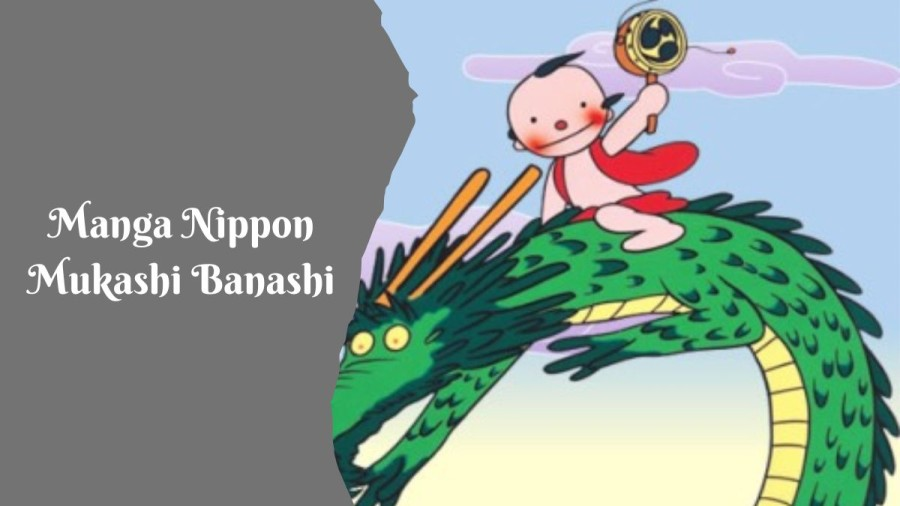

# Univariate analysis:

## Analysis on Type

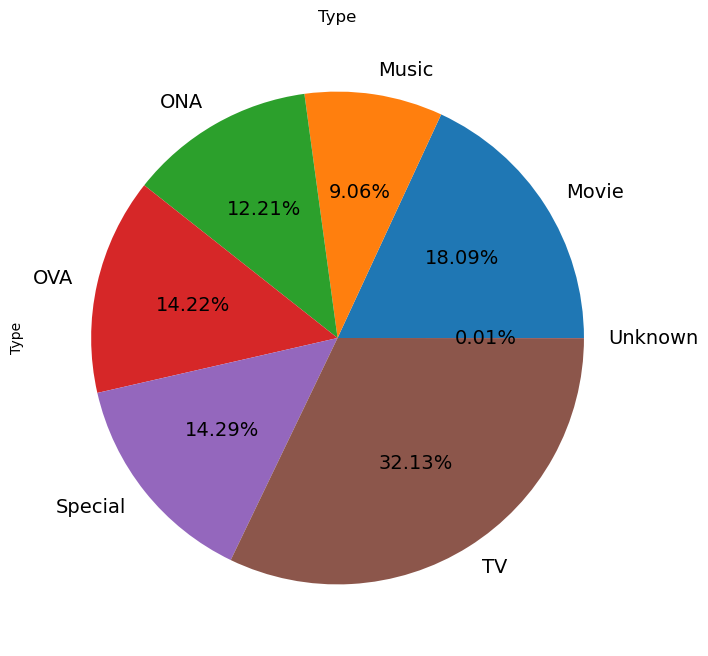

In [58]:
ax=anime.groupby(['Type'])['Type'].count().plot.pie(title='Type',figsize=(10,8), autopct= "%0.2f%%",fontsize=14)

## **It is found that most of the Animes are at the Type TV of 32% 

## Analysis on Source

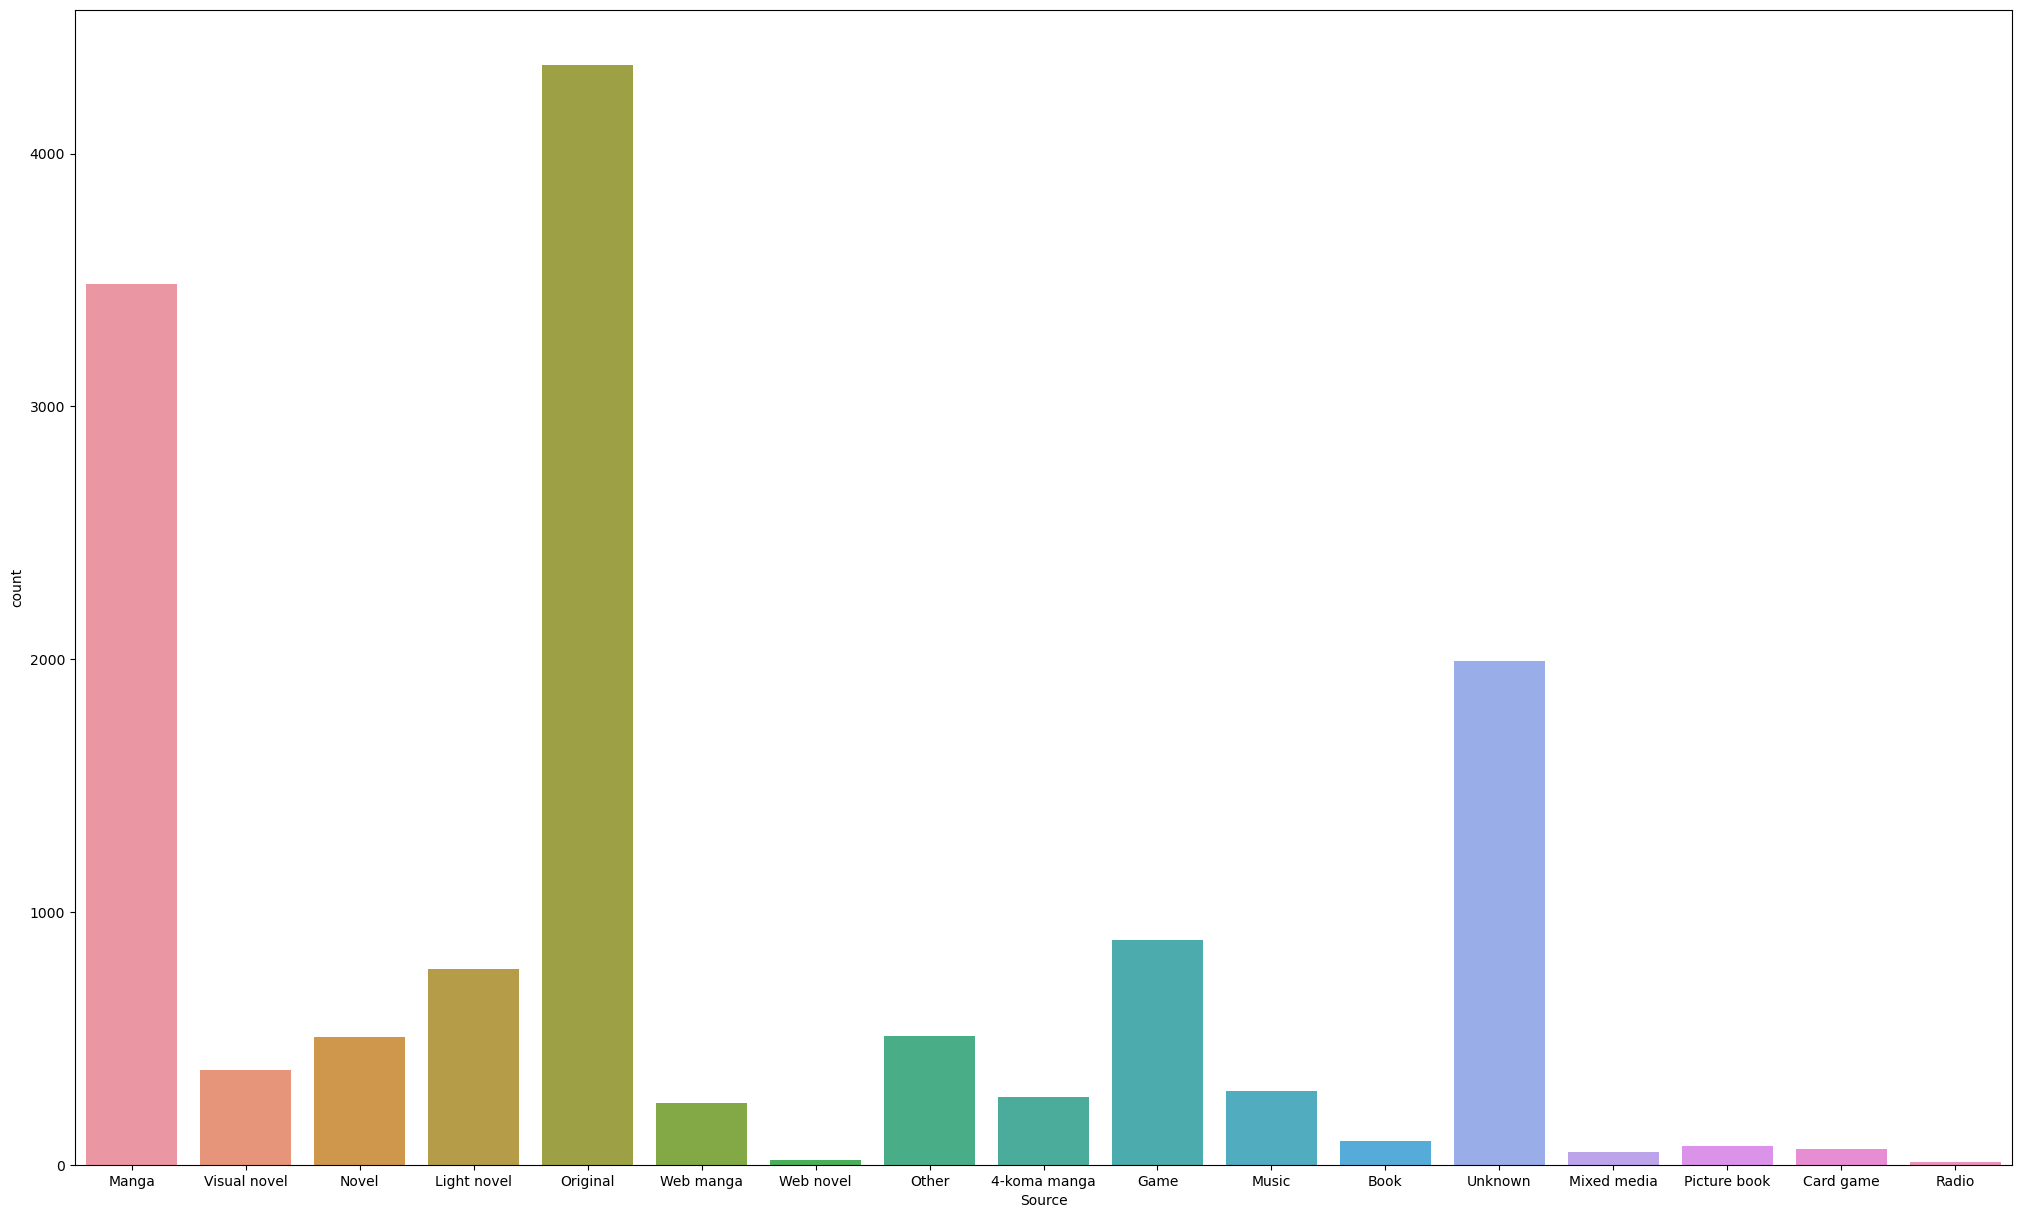

In [59]:
fig, ax = plt.subplots(figsize= (25,15))
ax = sns.countplot(x = anime["Source"])

## **It is found that most animes area the Source Original

## Analysis on status

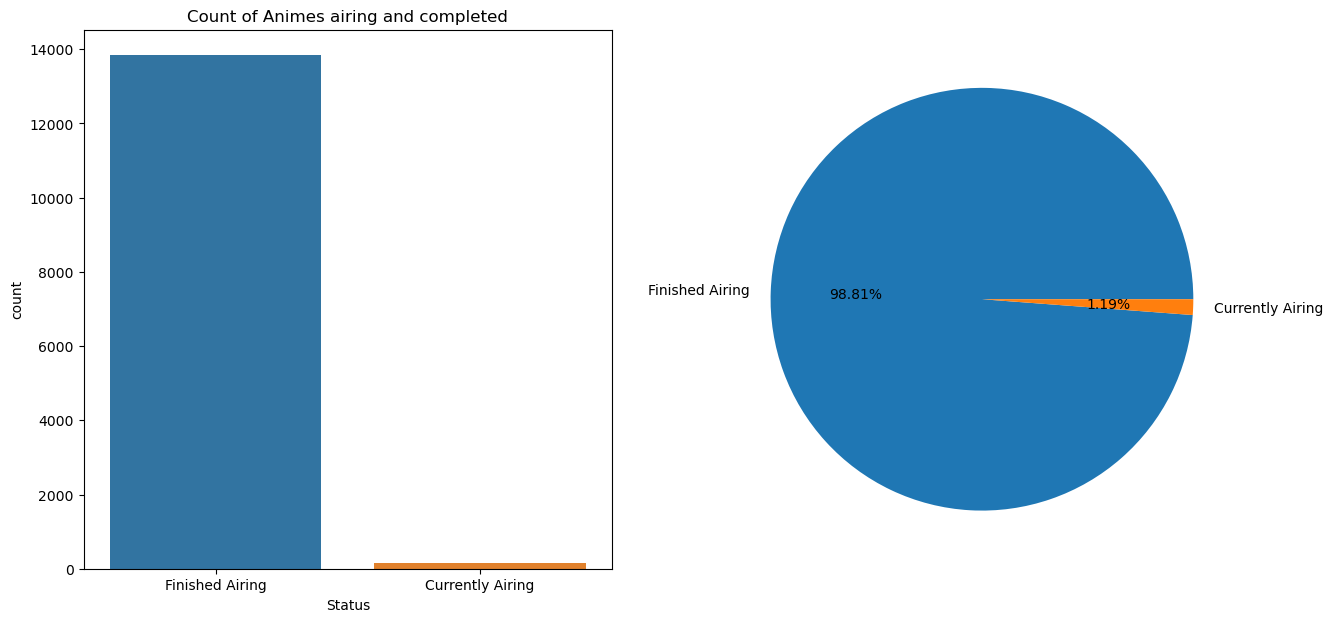

In [60]:
fig,ax = plt.subplots(1,2,figsize=(15,7))
ax[0].set_title("Count of Animes airing and completed")
percentage = anime["Status"].value_counts()
labels = list(anime["Status"].value_counts().index)

sns.countplot(x=anime["Status"],ax=ax[0])
plt.pie(percentage,labels= labels,autopct="%0.2f%%")

plt.show()

## **It is found that the Status of almost 99% Animes are Finished Airing.

## Analysis on Rating

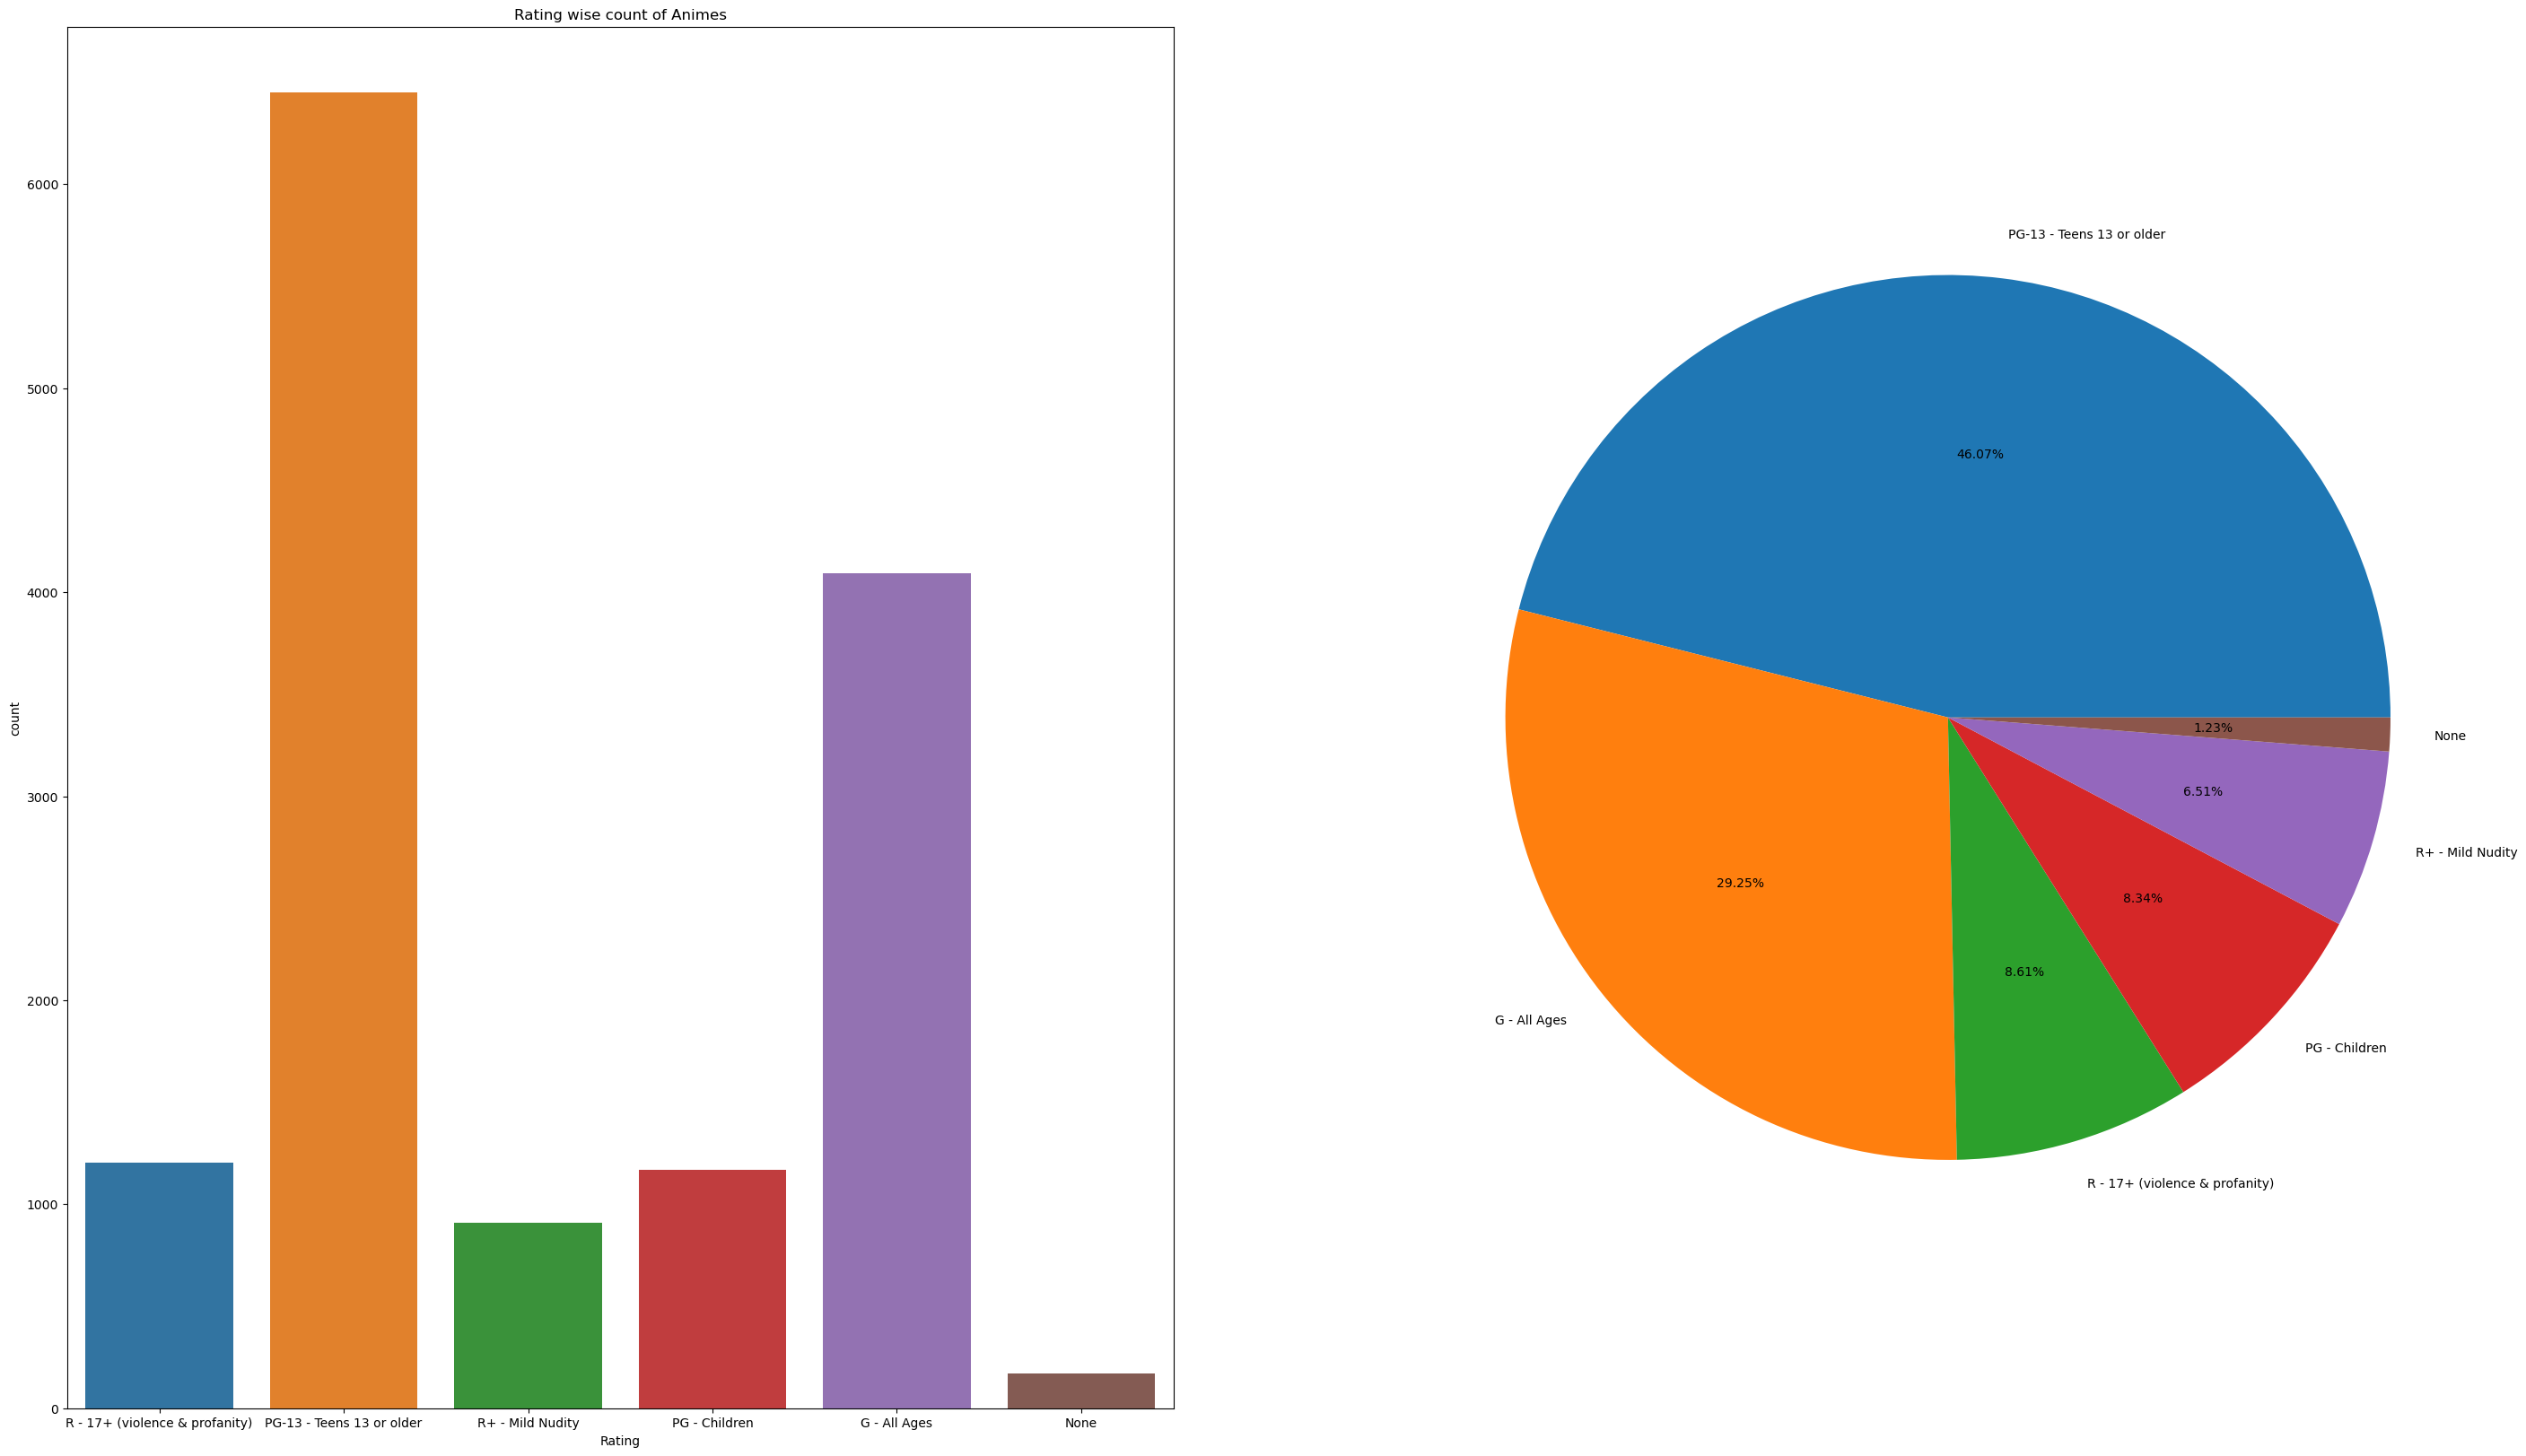

In [61]:
fig,ax = plt.subplots(1,2,figsize=(35,20))
ax[0].set_title("Rating wise count of Animes")
percentage = anime["Rating"].value_counts()
labels = list(anime["Rating"].value_counts().index)

sns.countplot(x=anime["Rating"],ax=ax[0])
plt.pie(percentage,labels= labels,autopct="%0.2f%%")

plt.show()

## **It is found that most animes are rated as PG-13 of almost 46%

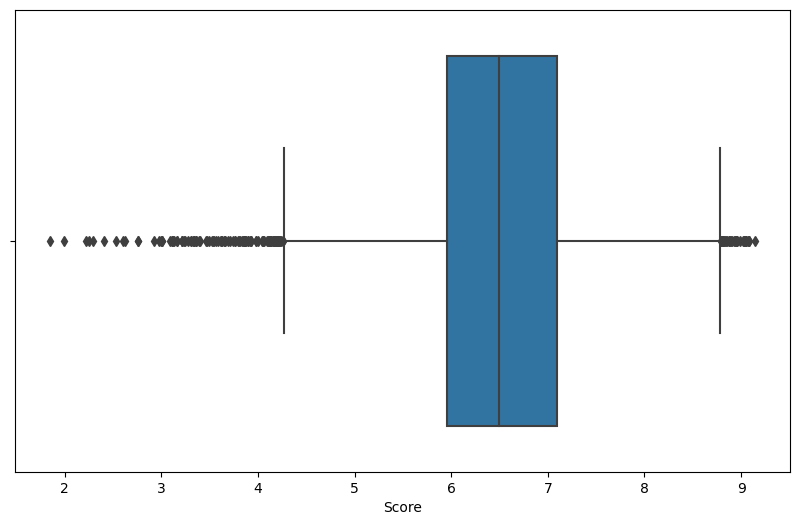

In [62]:
# Set the figure size
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed

# Create the box plot
sns.boxplot(x=anime["Score"])

# Show the plot
plt.show()

# Bivariate analysis

## Source wise Status of anime: 

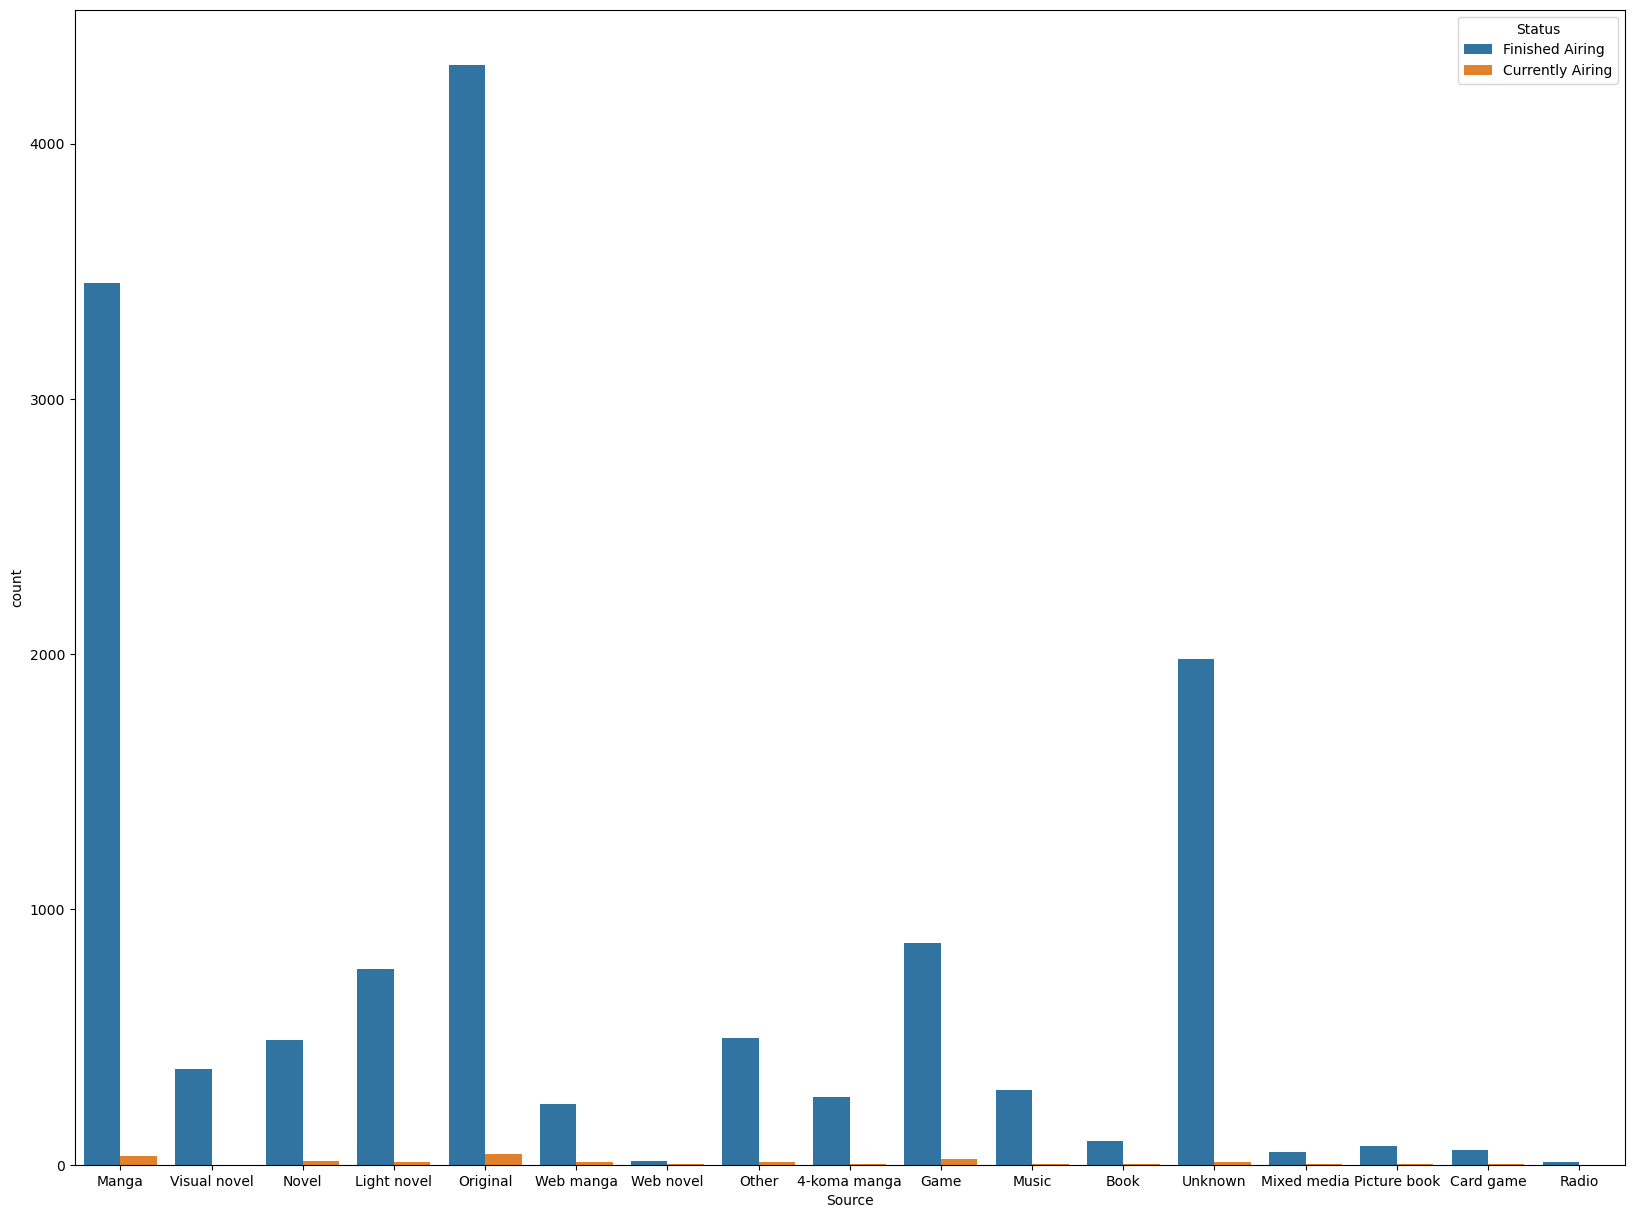

In [63]:
fig, ax = plt.subplots(figsize = (20, 15))
sns.countplot(x = "Source", hue = "Status", data = anime)
plt.show()

## ** It is found that the Source Original has more number of counts are in both Finished Airing and Currently Airing

## Type wise Status of anime:  

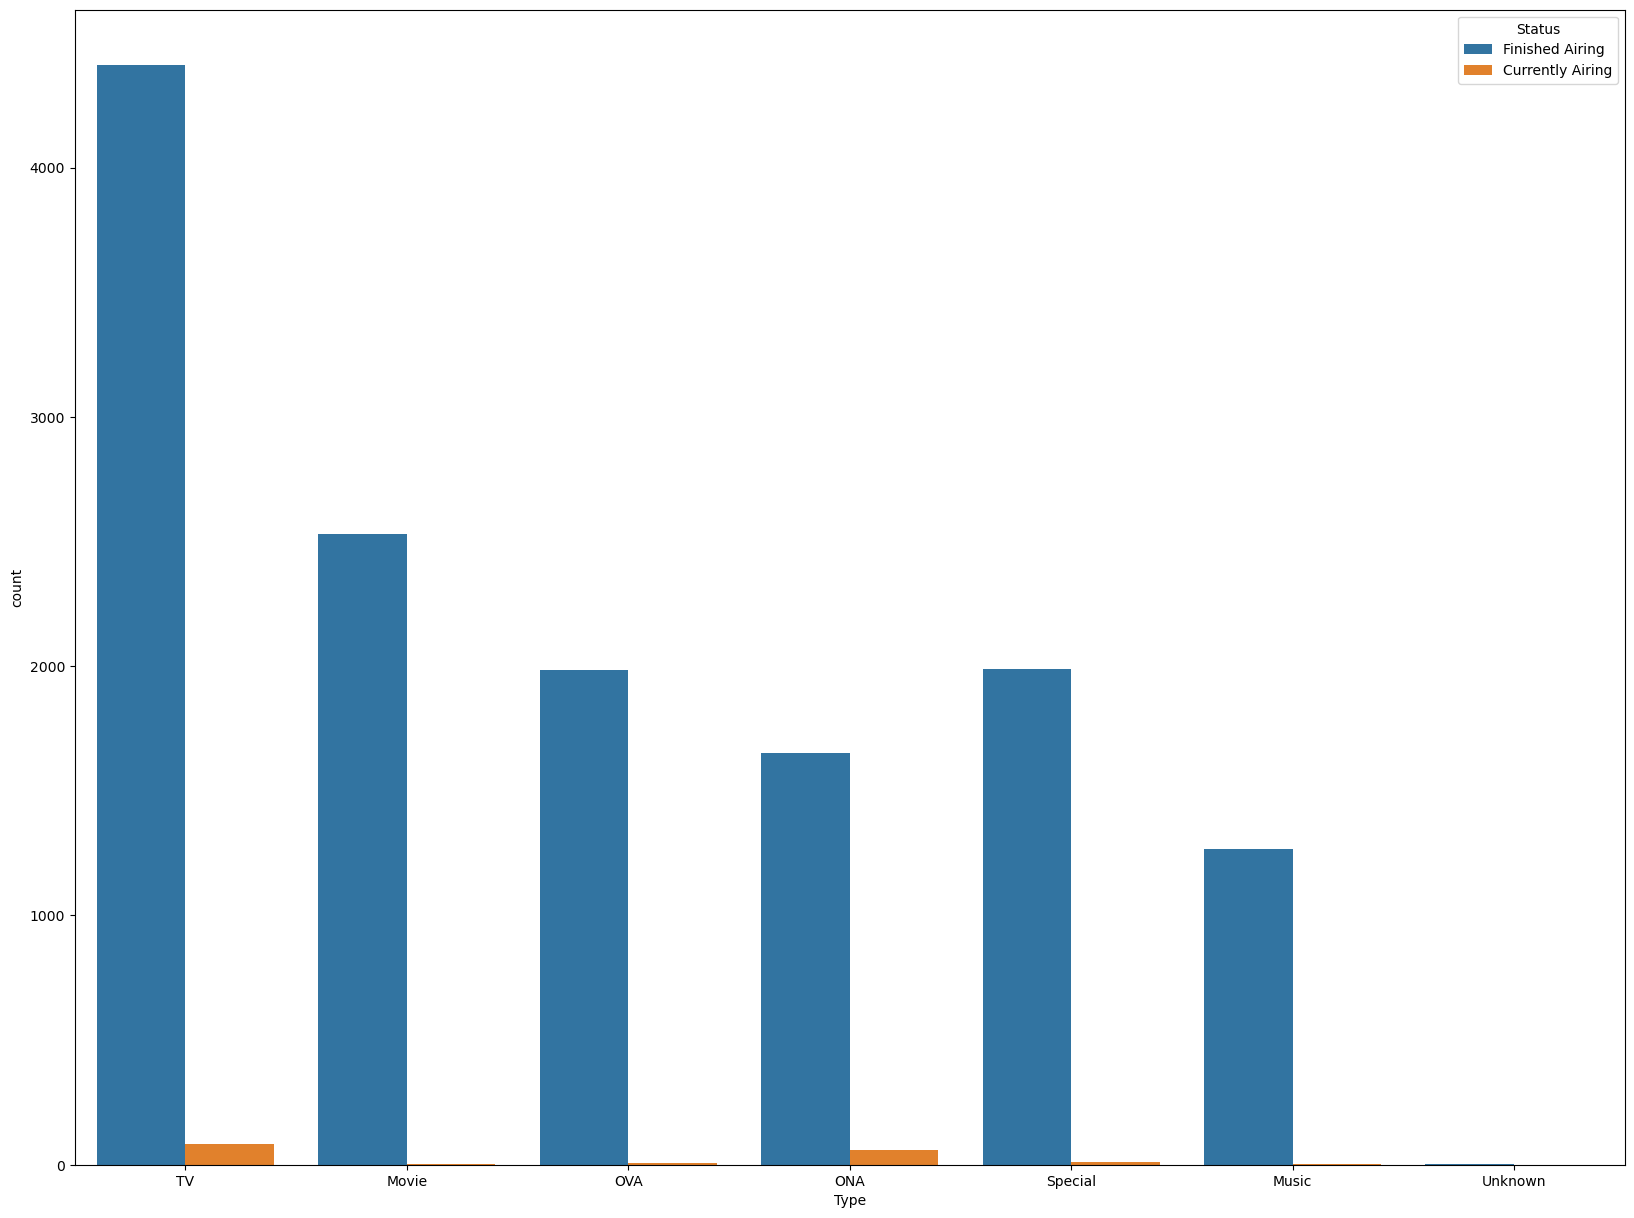

In [64]:
fig, ax = plt.subplots(figsize = (20, 15))
sns.countplot(x = "Type", hue = "Status", data = anime)
plt.show()

## **It is found that the TV Type has more count of status in both Currently Airing of about less than 100 and Finished Airing of about 4300.

## Source wise Type of anime: 

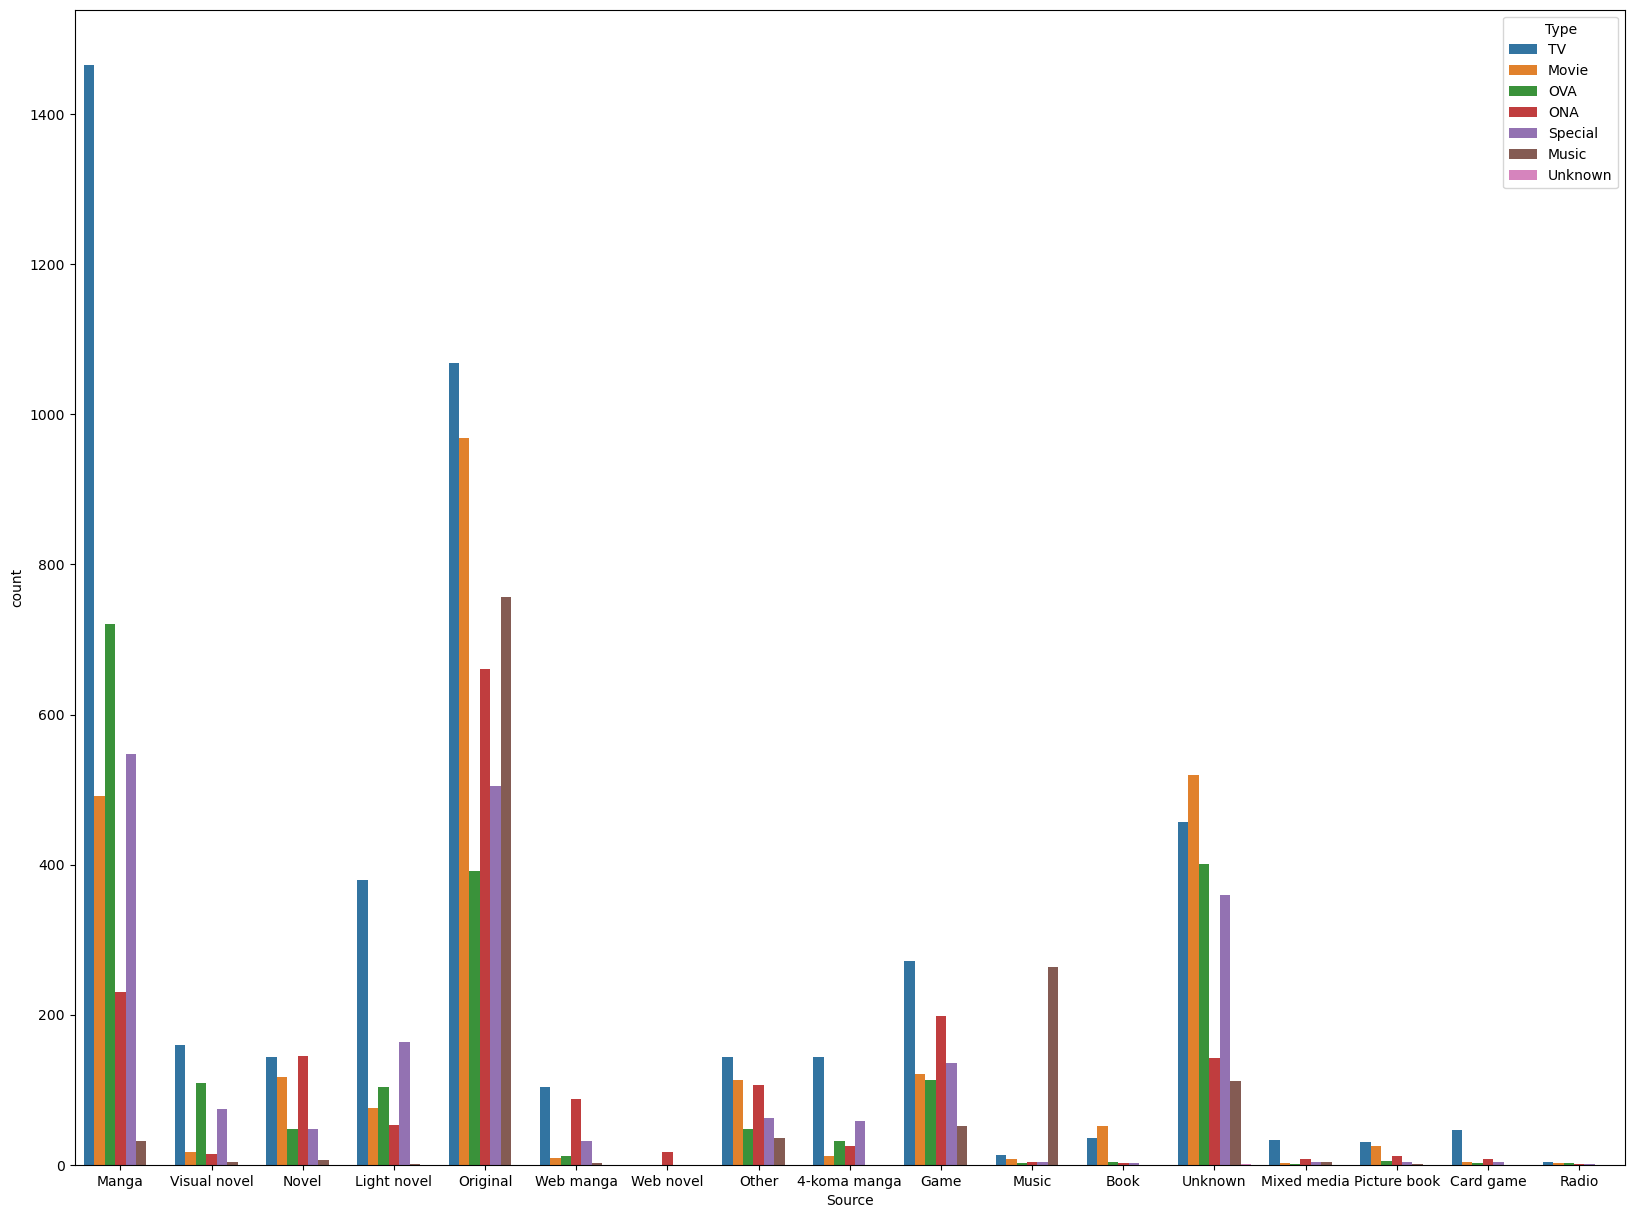

In [65]:
fig, ax = plt.subplots(figsize = (20, 15))
sns.countplot(x = "Source", hue = "Type", data = anime)
plt.show()

# It is found that most of the Types are from the Manga and Originals Source

# Total run time wise spread of members

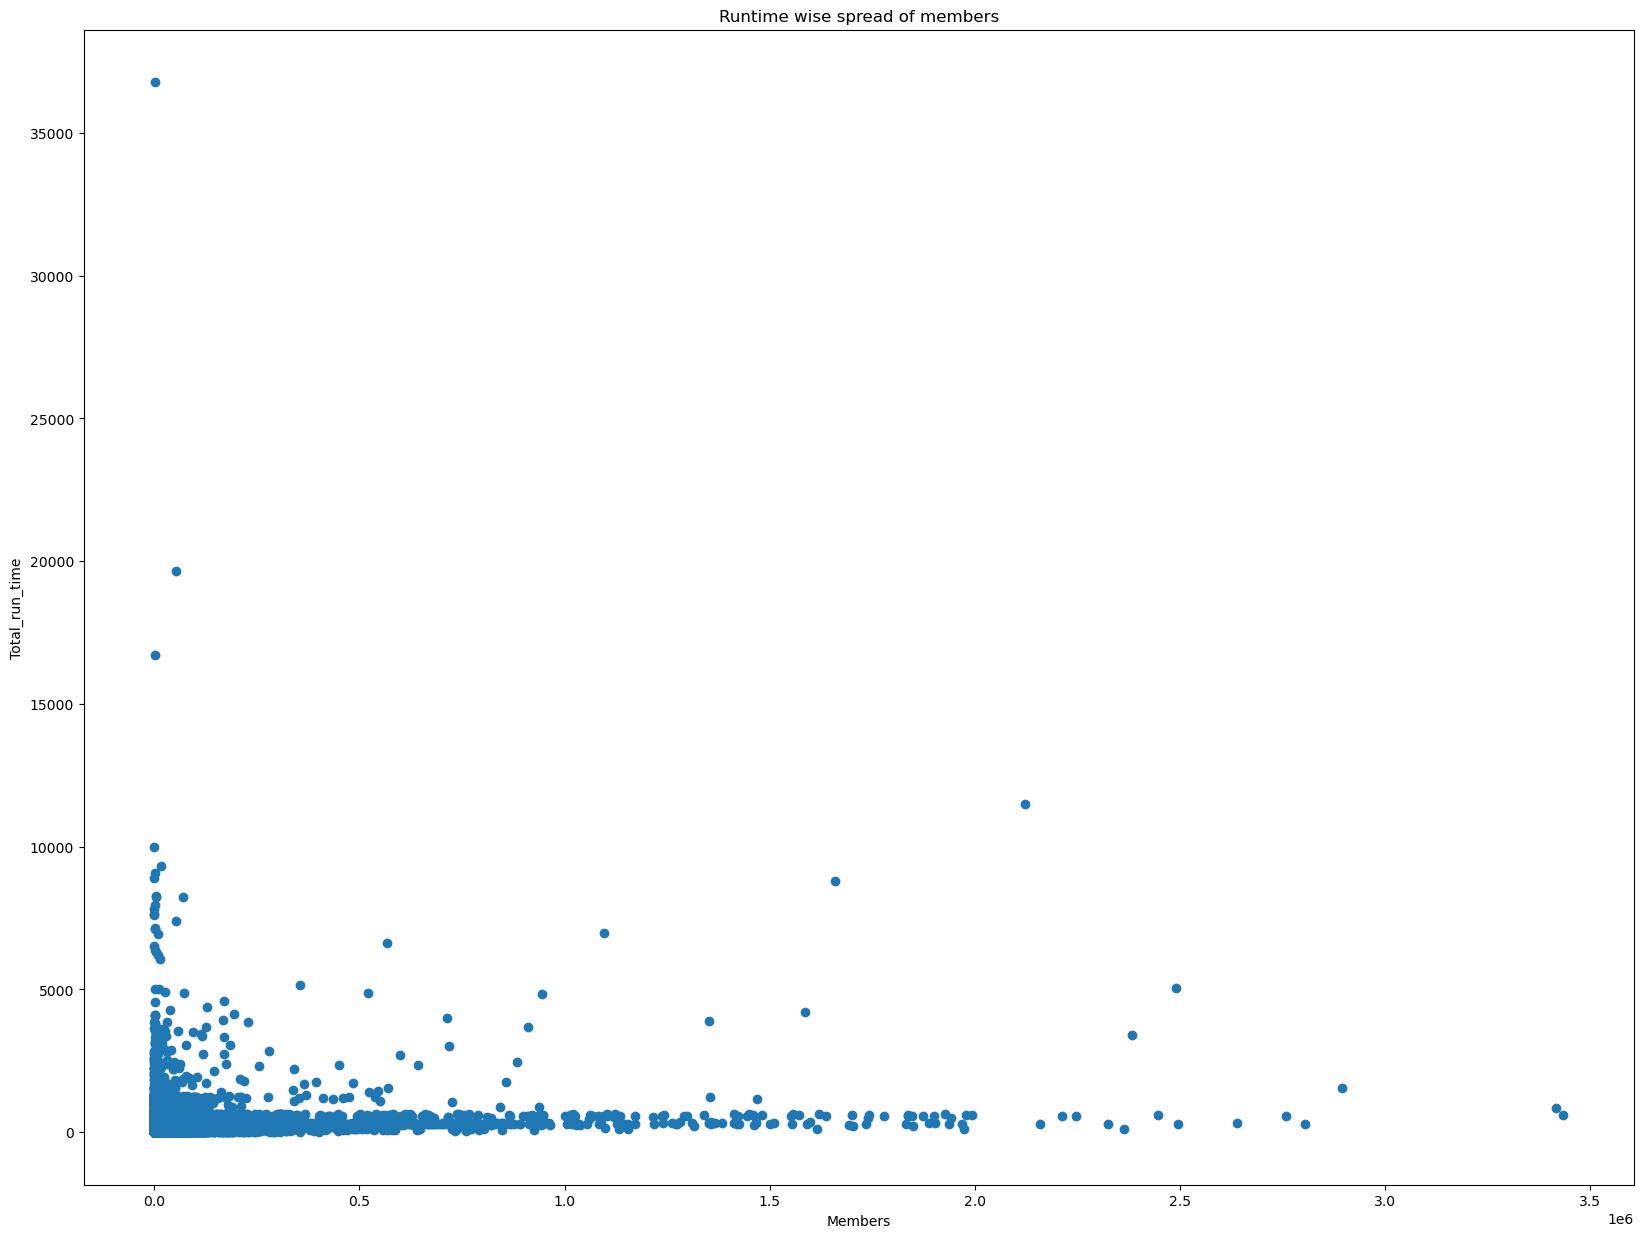

In [66]:
fig, ax = plt.subplots(figsize = (20, 15))
plt.scatter(anime['Members'],anime['Total_run_time'])
plt.xlabel('Members')
plt.ylabel('Total_run_time')
plt.title('Runtime wise spread of members')
plt.show()

# Relation between Scores and Total_run_time 

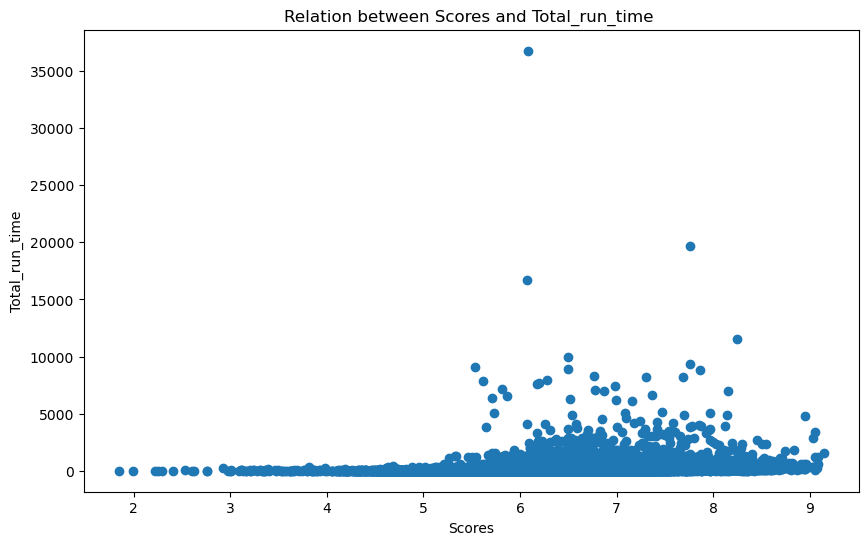

In [67]:
plt.figure(figsize=(10, 6))
plt.scatter(anime['Score'],anime['Total_run_time'])
plt.xlabel('Scores')
plt.ylabel('Total_run_time')
plt.title('Relation between Scores and Total_run_time ')
plt.show()


## * It is found that Animes with run_time in range 0-5000 is more and it has more scores in the range of  5 - 9.

# Scores wise spread of members

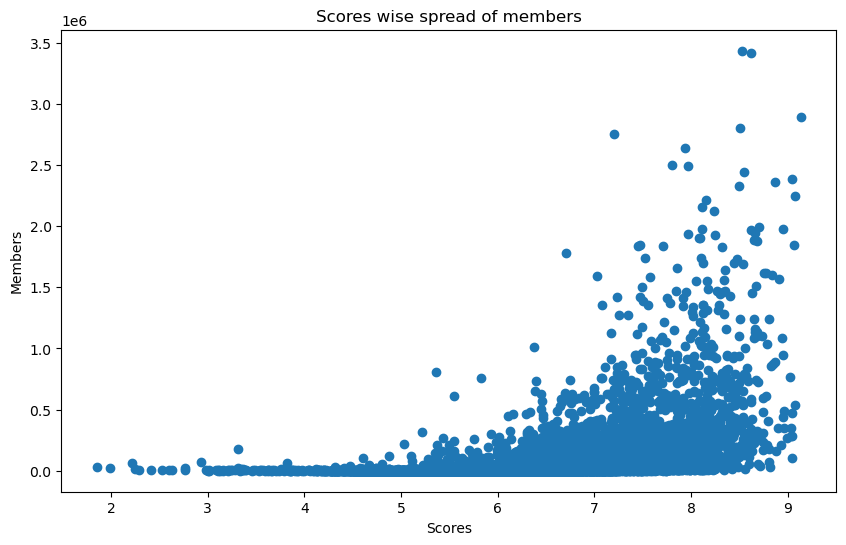

In [68]:
plt.figure(figsize=(10, 6))
plt.scatter(anime['Score'],anime['Members'])
plt.xlabel('Scores')
plt.ylabel('Members')
plt.title('Scores wise spread of members')
plt.show()

## **It is found that more members scored more than 5 and more members are at the range of 7-9.

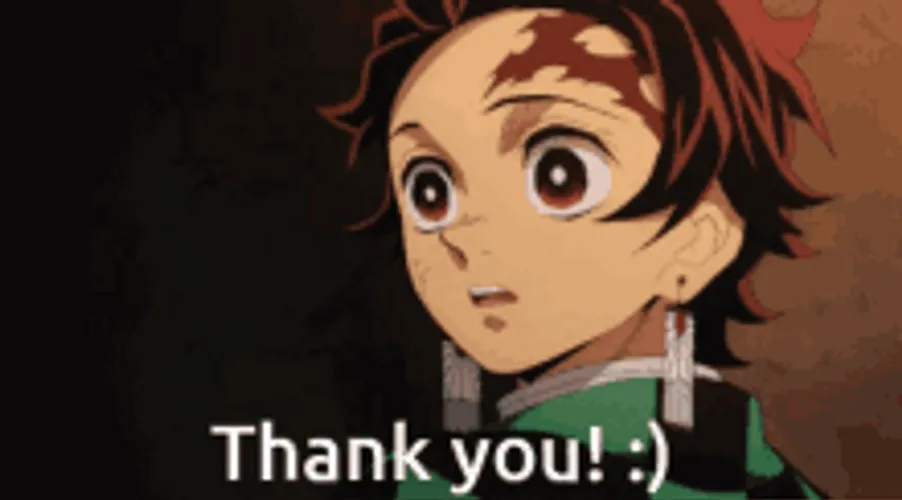 